# Test ios np.fft.rfft vs. py

In [ ]:
from notebooks import *
figsize(aspect=1/12)
def sigp(x):
    pp((x.shape, x[:7]))
def sig0(x):
    sigp(x)
    plt.plot(x); plt.show()
def sig(x):
    sig0(x)
    plt.plot(x[1:]); plt.show()

INFO     [17:17:38.711] [76529] 150 logging_/<module>: {logging_yaml: None}

In [ ]:
# Q: What is scipy.signal.spectrogram doing?
n       = 2048
x       = np.random.rand(n)
nperseg = 128
nf      = nperseg // 2 + 1
x0      = x[:nperseg]
detrend = lambda xs: xs - xs.mean()
window  = 'hann'
win     = scipy.signal.windows.get_window(window, nperseg)
scale   = np.sqrt(1.0 / win.sum()**2)
(f,t,S) = scipy.signal.spectrogram(x, 22050,
    window   = window,
    nperseg  = nperseg,
    noverlap = int(.5 * nperseg),
    scaling  = 'spectrum',   # Return units X**2 ('spectrum'), not units X**2/Hz ('density')
    mode     = 'magnitude',  # Return |STFT(x)**2|, not STFT(x)**2 (because "humans can't hear complex phase")
)
pp((f.shape, t.shape, S.shape))
pp({
    'strid': x0[:7],
    'detre': detrend(x0)[:7],
    'windo': (win * detrend(x0))[:7],
    'fft  ': np.fft.rfft(win * detrend(x0))[:7],
    'scale': scale * np.fft.rfft(win * detrend(x0))[:7],
    'mode ': np.abs(scale * np.fft.rfft(win * detrend(x0)))[:7],
    'TEST=': S.T[0][:7],
})

 685 scipy.signal.spectral/spectrogram: args , x_shape=(2048,), x=array([0.494, 0.018, 0.22 , 0.26 , 0.71 ]), fs=22050, window='hann', nperseg=128, noverlap=64, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='magnitude'

1481 scipy.signal.spectral/_spectral_helper: args , x_shape=(2048,), x=array([0.494, 0.018, 0.22 , 0.26 , 0.71 ]), fs=22050, nperseg=128, noverlap=64, nfft=None, detrend='constant', return_onesided=True, scaling='spectrum', mode='stft'

1710 scipy.signal.spectral/_fft_helper: args  , x_shape=(2048,), x=array([0.494, 0.018, 0.22 , 0.26 , 0.71 ]), nperseg=128, noverlap=64, nfft=128, sides='onesided'

1721 scipy.signal.spectral/_fft_helper: strid, result_shape=(31, 128), result=array([0.494, 0.018, 0.22 , 0.26 , 0.71 ]), step=64, strides=(512, 8), shape=(31, 128)

1725 scipy.signal.spectral/_fft_helper: detre, result_shape=(31, 128), result=array([ 0.016, -0.46 , -0.258, -0.219,  0.232])

1729 scipy.signal.spectral/_fft_helper: windo, result_shape=(31, 128), result=array([ 0.   , -0.   , -0.001, -0.001,  0.002]), win=array([0.   , 0.001, 0.002, 0.005, 0.01 ])

1738 scipy.signal.spectral/_fft_helper: fft  , result_shape=(31, 65), result=array([ 2.583+0.j   , -2.948-1.307j,  2.307+1.435j, -1.208+0.281j,  1.365-1.301j]), func=<function rfft at 0x11919b0d0>

1657 scipy.signal.spectral/_spectral_helper: scale, result_shape=(31, 65), result=array([ 0.04 +0.j   , -0.046-0.02j ,  0.036+0.022j, -0.019+0.004j,  0.021-0.02j ])

 713 scipy.signal.spectral/spectrogram: mode , Sxx_shape=(65, 31), Sxx=array([0.04 , 0.05 , 0.042, 0.019, 0.029])

(

(

65

,

)

,

(

31

,

)

,

(

65

,

31

)

)

{

'

strid

'

:

array([0.494, 0.018, 0.22 , 0.26 , 0.71 , 0.57 , 0.944])

,

'

detre

'

:

array([ 0.016, -0.46 , -0.258, -0.219,  0.232,  0.091,  0.466])

,

'

windo

'

:

array([ 0.   , -0.   , -0.001, -0.001,  0.002,  0.001,  0.01 ])

,

'

fft  

'

:

array([ 2.583+0.j   , -2.948-1.307j,  2.307+1.435j, -1.208+0.281j,  1.365-1.301j, -2.337-0.41j ,  2.43 +0.204j])

,

'

scale

'

:

array([ 0.04 +0.j   , -0.046-0.02j ,  0.036+0.022j, -0.019+0.004j,  0.021-0.02j , -0.037-0.006j,  0.038+0.003j])

,

'

mode 

'

:

array([0.04 , 0.05 , 0.042, 0.019, 0.029, 0.037, 0.038])

,

'

TEST=

'

:

array([0.04 , 0.05 , 0.042, 0.019, 0.029, 0.037, 0.038])

}

(

(

65

,

)

,

array([0.04 , 0.05 , 0.042, 0.019, 0.029, 0.037, 0.038])

)

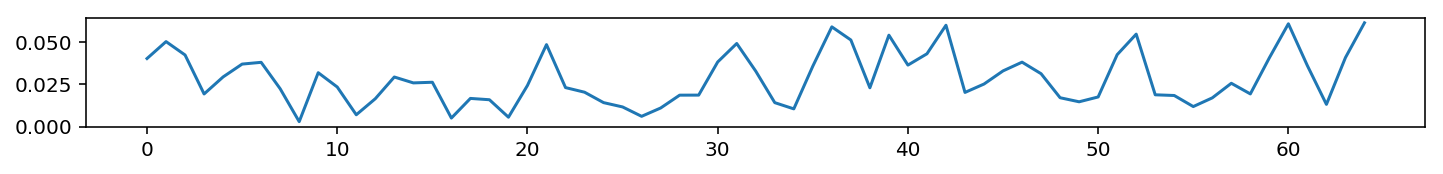

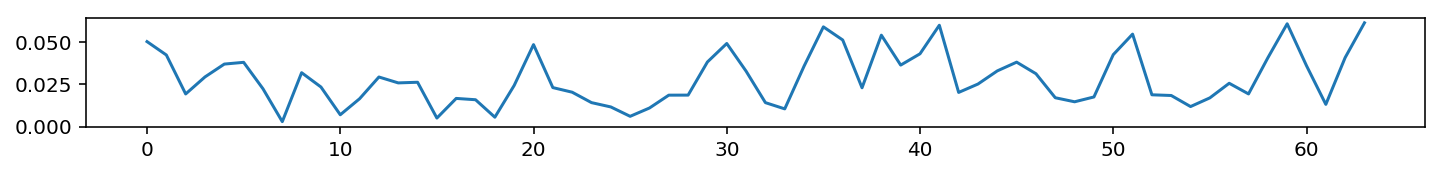

In [ ]:
# Recreate f0 in vDSP
#   - Maybe also simplify the np target? [XXX Nope, dct's don't look simply related; stick to abs(rfft)]
detrend = lambda xs: xs - xs.mean()
window  = 'hann'
win     = scipy.signal.windows.get_window(window, nperseg)
scale   = np.sqrt(1.0 / win.sum()**2)
f0      = np.abs(scale * np.fft.rfft(win * detrend(x0)))
sig(f0)

[0.4940140229790255, 0.017981532701817793, 0.22045047471643042, 0.25979756787131414, 0.7101849277608944, 0.5697283049774661, 0.9439275587914135, 0.842371845837429, 0.5711204203575068, 0.32674946303924146, 0.08802192445806534, 0.12426003259764495, 0.4026434375518072, 0.22829886508920028, 0.6663955425892332, 0.5910155126147232]

[7.056961433933213, 1.278535206380839, 2.393728303455053, 0.2532280382495736, 0.7227516602446252, 0.22349296717789197, 0.5266739566268884, 0.45329539014527787, 1.1365551844755393]

(

(

16

,

)

,

array([0.494, 0.018, 0.22 , 0.26 , 0.71 , 0.57 , 0.944])

)

(

(

9

,

)

,

array([7.057, 1.279, 2.394, 0.253, 0.723, 0.223, 0.527])

)

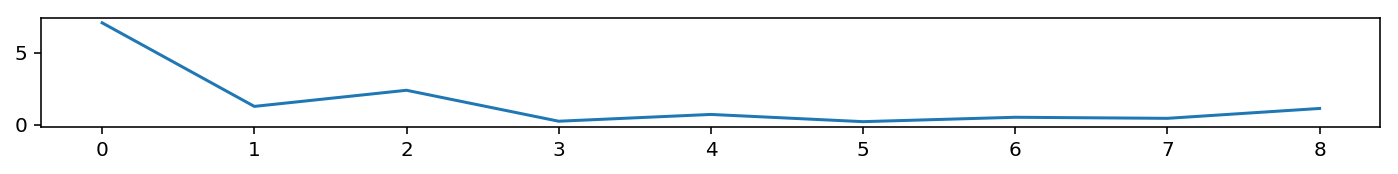

(

(

9

,

)

,

array([7.057, 1.279, 2.394, 0.253, 0.723, 0.223, 0.527])

)

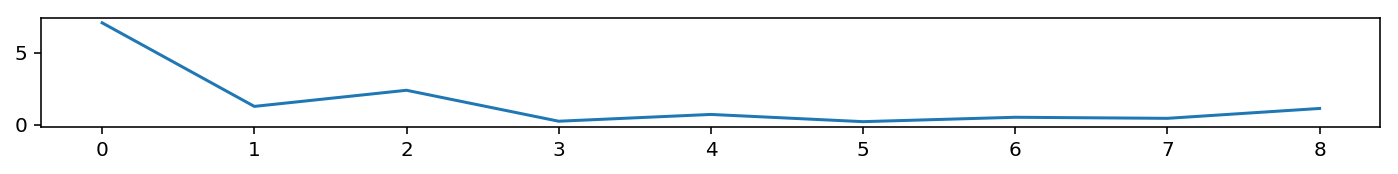

In [ ]:
# Recreate abs(rfft) in vDSP (trivial to extend back to f0)
# y = x0    # Real-sized input (128)
y = x0[:16] # Mock input for swift dev
print(json.dumps(list(y)))                       # To copy to .swift
print(json.dumps(list(np.abs(np.fft.rfft(y)))))  # To copy to .swift
sigp(y)
sig0(np.abs(np.fft.rfft(y)))               # Goal: abs(rfft(x))
sig0(np.abs(np.fft.fft(y)[:len(y)//2+1]))  # Same: abs(fft(x[:n//2+1]))

In [ ]:
# Maybe simplify in np (for simpler/faster vDSP)?
#   - XXX Nope, dct's don't look simply related; stick to abs(rfft)
dcts = {
    type: scipy.fftpack.dct(x0, type=type)
    for type in [1,2,3]
}
for type, d in dcts.items():
    print(f'type={type}: ', end='')
    sig(d[:nf])

[skip]